# Dataset Basic

In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LassoLars
from sklearn.linear_model import  ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import  MultiTaskElasticNet
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import MultiTaskElasticNetCV
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error,r2_score
warnings.filterwarnings('ignore')

In [2]:
data_set = pd.read_csv("Data about sales and rest.csv")
data_set.head(5)

,Unnamed: 0,Restaurant,Restaurant Type,Area,District,Start Day,Start Month,Start Year,base on District-# of ppl able to work>15 - 19,base on District-# of ppl able to work>20 - 24,...,total Sales,payment type-cash,payment type-visa/master,payment type-others,#of transaction,sqf,mthly rent,Restaurant Type.1,Location Type,Restaurant Status
0,0,1,5,2,6,5,8,2019,3062,19413,...,3967,55296,7645,10592,5879,4192,120179,5,2,0
1,1,2,5,2,6,5,8,2019,3062,16189,...,4596,39374,4421,4221,2655,3481,120808,5,2,0
2,2,3,5,2,6,5,8,2019,3062,15872,...,4750,43831,4104,7498,2338,6425,120962,5,2,0
3,3,4,5,2,6,5,8,2019,3062,16433,...,4818,29669,4665,3455,2899,6956,121030,5,2,0
4,4,5,5,2,6,5,8,2019,3062,15887,...,4914,52195,4119,4613,2353,3003,121126,5,2,0


In [3]:
data_set['Restaurant Type'].unique()

array([5, 6, 2, 1, 4, 3], dtype=int64)

In [4]:
data_set.columns

Index(['Unnamed: 0', 'Restaurant', 'Restaurant Type', 'Area', 'District',
       'Start Day', 'Start Month', 'Start Year',
       'base on District-# of ppl able to work>15 - 19',
       'base on District-# of ppl able to work>20 - 24',
       'base on District-# of ppl able to work>25 - 29',
       'base on District-# of ppl able to work>30 - 34',
       'base on District-# of ppl able to work>35 - 39',
       'base on District-# of ppl able to work>40 - 44',
       'base on District-# of ppl able to work>45 - 49',
       'base on District-# of ppl able to work>50 - 54',
       'base on District-# of ppl able to work>55 - 59',
       'base on District-# of ppl able to work>60 - 64',
       'base on District-# of ppl able to work>65+',
       'base on Area #of worker location>15 - 19',
       'base on Area #of worker location>20 - 24',
       'base on Area #of worker location>25 - 29',
       'base on Area #of worker location>30 - 34',
       'base on Area #of worker location>35 - 39',

In [5]:
i = 0
print("Columns\t|Null Values")
while i< len(data_set.columns):
    print(data_set.columns.values[i],"|",data_set.iloc[:, i].isnull().sum(axis = 0))
    i = i+1

Columns	|Null Values
Unnamed: 0 | 0
Restaurant | 0
Restaurant Type | 0
Area | 0
District | 0
Start Day | 0
Start Month | 0
Start Year | 0
base on District-# of ppl able to work>15 - 19 | 0
base on District-# of ppl able to work>20 - 24 | 0
base on District-# of ppl able to work>25 - 29 | 0
base on District-# of ppl able to work>30 - 34 | 0
base on District-# of ppl able to work>35 - 39 | 0
base on District-# of ppl able to work>40 - 44 | 0
base on District-# of ppl able to work>45 - 49 | 0
base on District-# of ppl able to work>50 - 54 | 0
base on District-# of ppl able to work>55 - 59 | 0
base on District-# of ppl able to work>60 - 64 | 0
base on District-# of ppl able to work>65+ | 0
base on Area #of worker location>15 - 19 | 0
base on Area #of worker location>20 - 24 | 0
base on Area #of worker location>25 - 29 | 0
base on Area #of worker location>30 - 34 | 0
base on Area #of worker location>35 - 39 | 0
base on Area #of worker location>40 - 44 | 0
base on Area #of worker location>45

In [6]:
data_set = data_set.fillna(0)

In [7]:
data_set['Restaurant Status'].unique()

array([0, 1], dtype=int64)

# Overall status

Text(0.5, 1.0, 'Count of Restaurant Status')

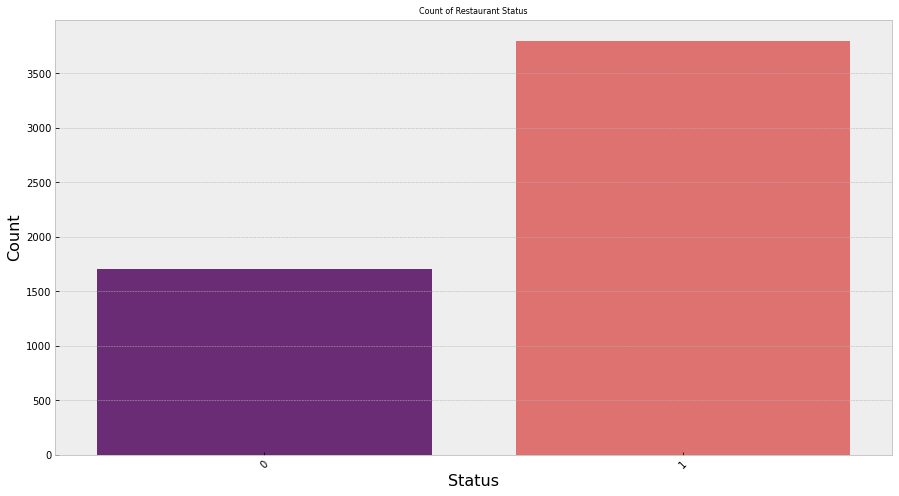

In [53]:
l = data_set['Restaurant Status'].value_counts()
n = pd.DataFrame(data_set['Restaurant Status'].value_counts()).index.values
plt.style.use('bmh')
plt.figure(figsize=(15,8))
sns.barplot(n, l, palette='magma')
plt.xticks(rotation=45)
plt.xlabel('Status',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.title("Count of Restaurant Status",fontsize=8)

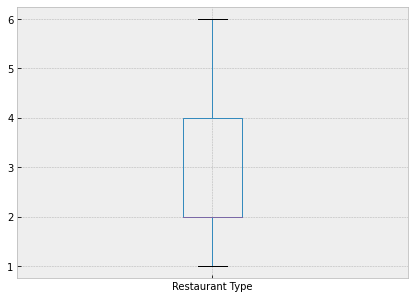

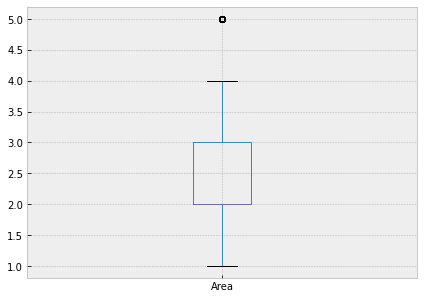

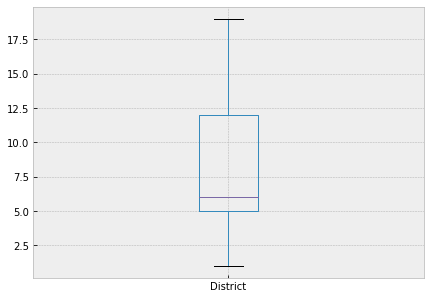

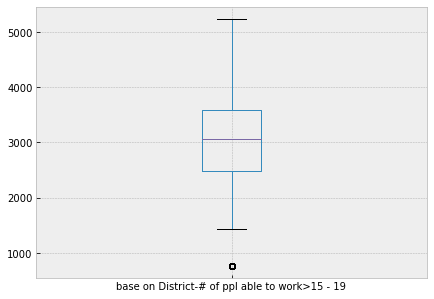

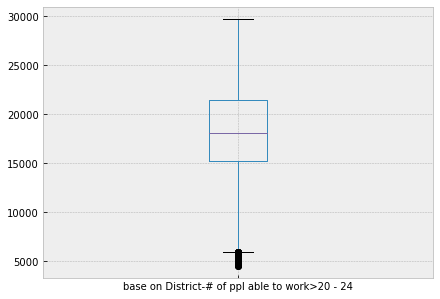

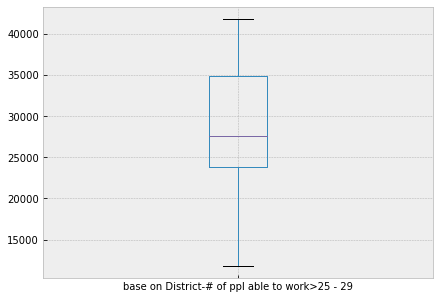

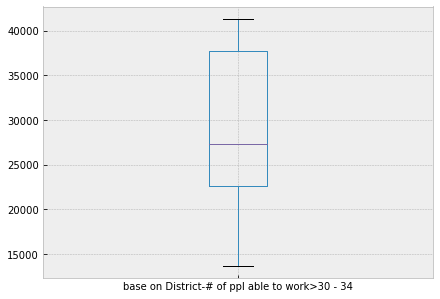

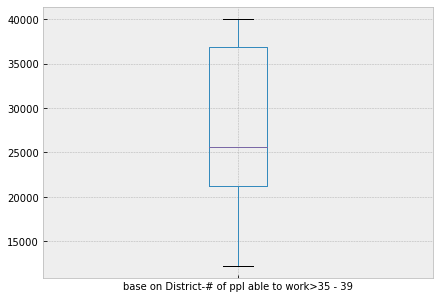

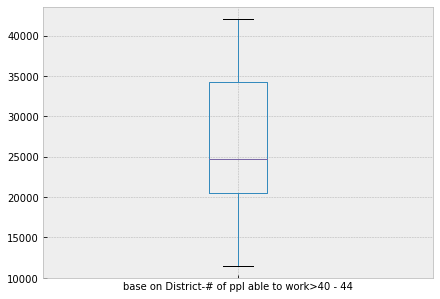

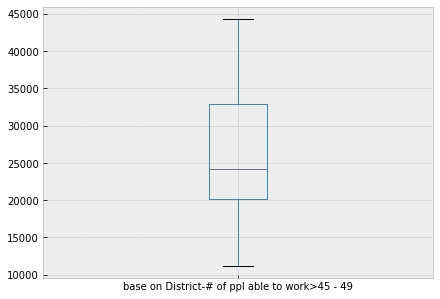

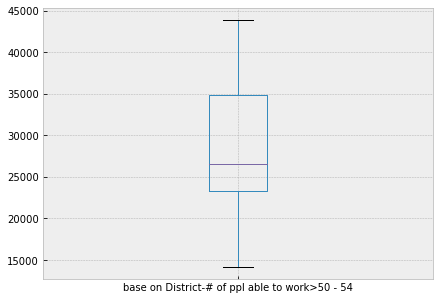

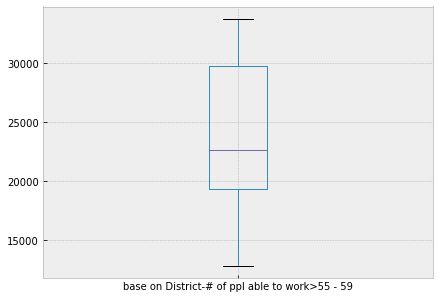

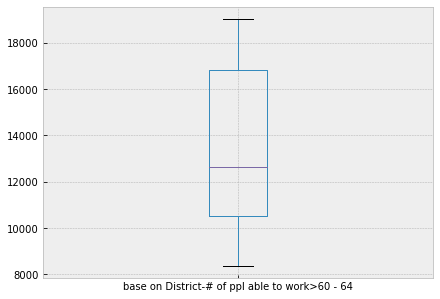

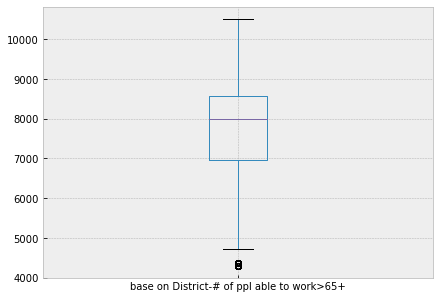

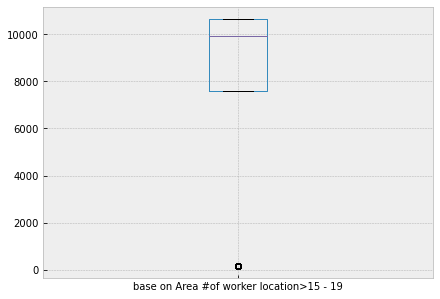

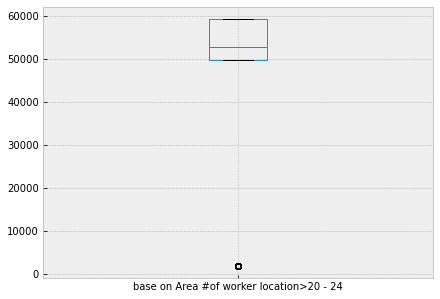

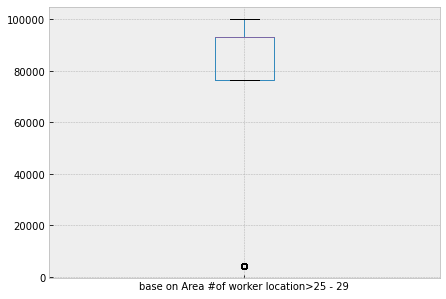

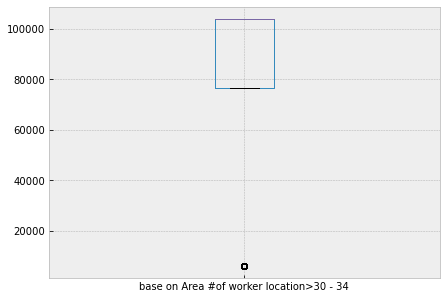

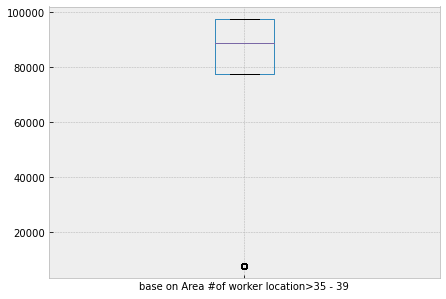

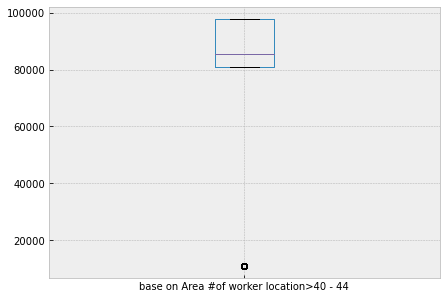

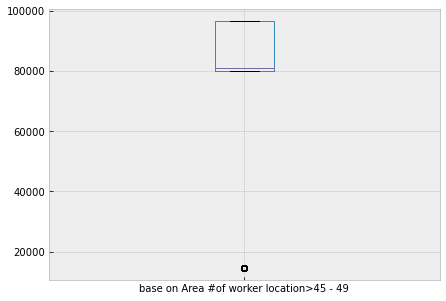

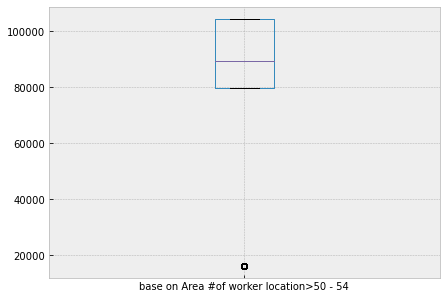

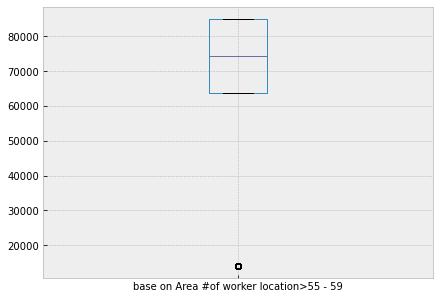

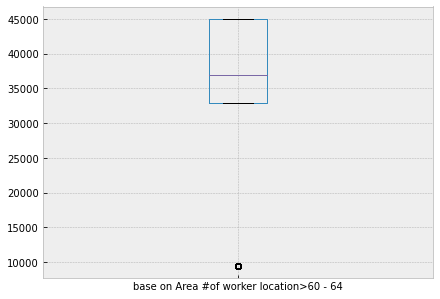

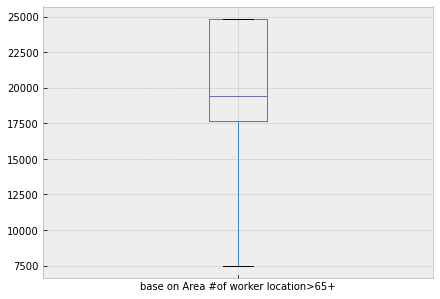

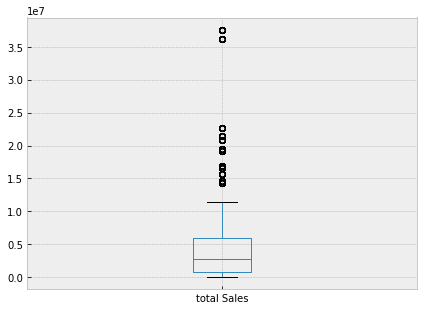

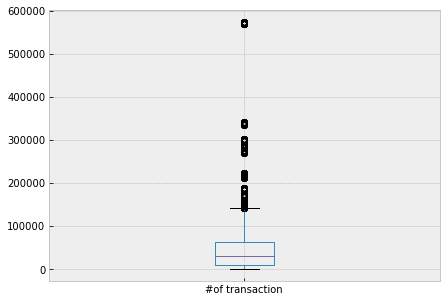

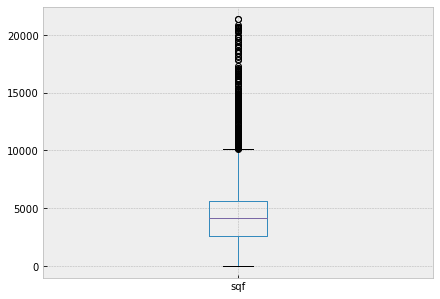

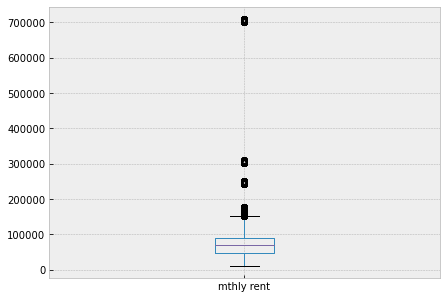

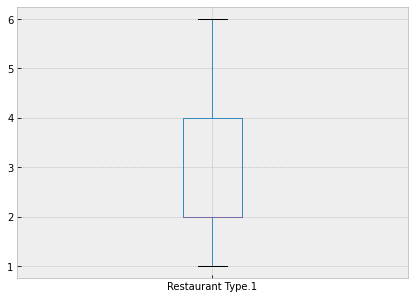

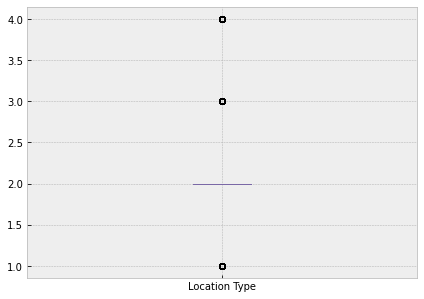

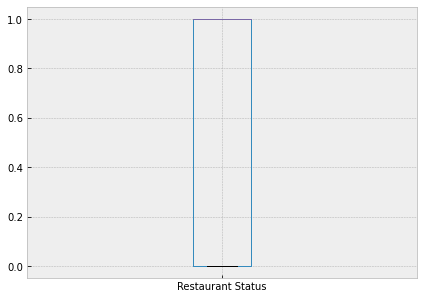

In [49]:
box_df = data_set[['Restaurant Type', 'Area', 'District',
       'base on District-# of ppl able to work>15 - 19',
       'base on District-# of ppl able to work>20 - 24',
       'base on District-# of ppl able to work>25 - 29',
       'base on District-# of ppl able to work>30 - 34',
       'base on District-# of ppl able to work>35 - 39',
       'base on District-# of ppl able to work>40 - 44',
       'base on District-# of ppl able to work>45 - 49',
       'base on District-# of ppl able to work>50 - 54',
       'base on District-# of ppl able to work>55 - 59',
       'base on District-# of ppl able to work>60 - 64',
       'base on District-# of ppl able to work>65+',
       'base on Area #of worker location>15 - 19',
       'base on Area #of worker location>20 - 24',
       'base on Area #of worker location>25 - 29',
       'base on Area #of worker location>30 - 34',
       'base on Area #of worker location>35 - 39',
       'base on Area #of worker location>40 - 44',
       'base on Area #of worker location>45 - 49',
       'base on Area #of worker location>50 - 54',
       'base on Area #of worker location>55 - 59',
       'base on Area #of worker location>60 - 64',
       'base on Area #of worker location>65+', 'total Sales',
       '#of transaction', 'sqf', 'mthly rent', 'Restaurant Type.1',
       'Location Type','Restaurant Status']]
from pylab import rcParams
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = 7, 5
for column in box_df:
    plt.figure()
    box_df.boxplot([column])

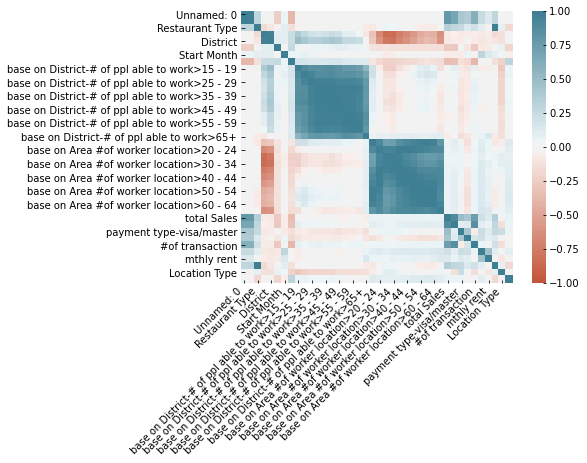

In [52]:


corr = data_set.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
Final=data_set

# Classification Algorithms for Resutrant Status

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot
X = Final[['Restaurant Type', 'Area', 'District',
       'base on District-# of ppl able to work>15 - 19',
       'base on District-# of ppl able to work>20 - 24',
       'base on District-# of ppl able to work>25 - 29',
       'base on District-# of ppl able to work>30 - 34',
       'base on District-# of ppl able to work>35 - 39',
       'base on District-# of ppl able to work>40 - 44',
       'base on District-# of ppl able to work>45 - 49',
       'base on District-# of ppl able to work>50 - 54',
       'base on District-# of ppl able to work>55 - 59',
       'base on District-# of ppl able to work>60 - 64',
       'base on District-# of ppl able to work>65+',
       'base on Area #of worker location>15 - 19',
       'base on Area #of worker location>20 - 24',
       'base on Area #of worker location>25 - 29',
       'base on Area #of worker location>30 - 34',
       'base on Area #of worker location>35 - 39',
       'base on Area #of worker location>40 - 44',
       'base on Area #of worker location>45 - 49',
       'base on Area #of worker location>50 - 54',
       'base on Area #of worker location>55 - 59',
       'base on Area #of worker location>60 - 64',
       'base on Area #of worker location>65+', 'total Sales',
       '#of transaction', 'sqf', 'mthly rent', 'Restaurant Type.1',
       'Location Type']]
y = Final[['Restaurant Status']]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


A support vector machine model to predict whether restaurant open or not
	Model			Train Acc	Test Acc
Support Vector Machine		   69 % 	   68 % 	  


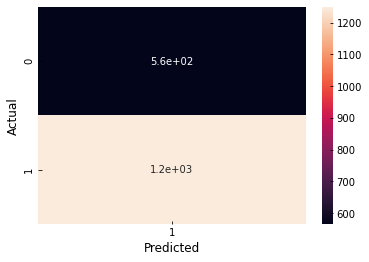

Confusion Matrix: SVM 
[[   0  565]
 [   0 1250]]
Classification Report:SVM 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       565
           1       0.69      1.00      0.82      1250

    accuracy                           0.69      1815
   macro avg       0.34      0.50      0.41      1815
weighted avg       0.47      0.69      0.56      1815

('Support Vector Machine Classifier Accuracy:', 68.87052341597796)


In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
print("A support vector machine model to predict whether restaurant open or not")
clf = SVC()
clf.fit(X_train, y_train.values.ravel())
y_true, y_pred = y_test, clf.predict(X_test)
print("\tModel\t\t\tTrain Acc\tTest Acc")
print("Support Vector Machine\t\t  ",int(clf.score(X_train,y_train)*100),"% \t  ", int(100*clf.score(X_test,y_test)),"% \t  ")
TrueResultslat=y_test
PredictedResultslat=clf.predict(X_test)
data = {'y_Actual':    y_test['Restaurant Status'].values,
    'y_Predicted': PredictedResultslat
    }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrixf = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrixf, annot=True)
plt.show()
print(("Confusion Matrix: SVM "))
print(confusion_matrix(y_test,PredictedResultslat))
print(("Classification Report:SVM "))
print(classification_report(y_test,PredictedResultslat))
LR_accuracy = metrics.accuracy_score(y_test, PredictedResultslat)
print(("Support Vector Machine Classifier Accuracy:" ,LR_accuracy*100))
Accuracy_SVM=LR_accuracy*100

A Logistic Regression model to predict whether restaurant open or not
	Model			Train Acc	Test Acc
Logistic Regression		   69 % 	   69 % 	  


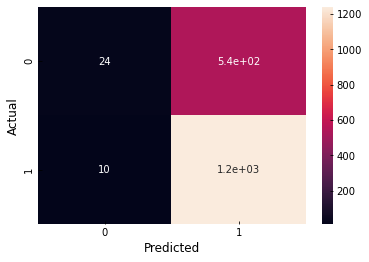

Confusion Matrix: Logistic Regression 
[[  24  541]
 [  10 1240]]
Classification Report:Logistic Regression 
              precision    recall  f1-score   support

           0       0.71      0.04      0.08       565
           1       0.70      0.99      0.82      1250

    accuracy                           0.70      1815
   macro avg       0.70      0.52      0.45      1815
weighted avg       0.70      0.70      0.59      1815

('Logistic Regression Classifier Accuracy:', 69.64187327823691)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
print("A Logistic Regression model to predict whether restaurant open or not")
clf = LogisticRegression()
clf.fit(X_train, y_train.values.ravel())
y_true, y_pred = y_test, clf.predict(X_test)
print("\tModel\t\t\tTrain Acc\tTest Acc")
print("Logistic Regression\t\t  ",int(clf.score(X_train,y_train)*100),"% \t  ", int(100*clf.score(X_test,y_test)),"% \t  ")
TrueResultslat=y_test
PredictedResultslat=clf.predict(X_test)
data = {'y_Actual':    y_test['Restaurant Status'].values,
    'y_Predicted': PredictedResultslat
    }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrixf = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrixf, annot=True)
plt.show()
print(("Confusion Matrix: Logistic Regression "))
print(confusion_matrix(y_test,PredictedResultslat))
print(("Classification Report:Logistic Regression "))
print(classification_report(y_test,PredictedResultslat))
LR_accuracy = metrics.accuracy_score(y_test, PredictedResultslat)
print(("Logistic Regression Classifier Accuracy:" ,LR_accuracy*100))
Accuracy_Logistic=LR_accuracy*100

A Decision Tree Classifier model to predict whether restaurant open or not
	Model			Train Acc	Test Acc
Decision Tree Classifier		   93 % 	   92 % 	  


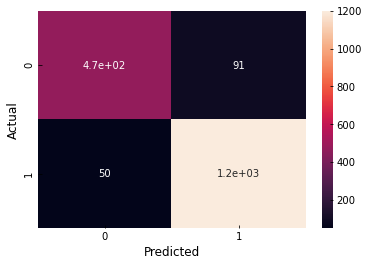

Confusion Matrix: Decision Tree Classifier 
[[ 474   91]
 [  50 1200]]
Classification Report:Decision Tree Classifier 
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       565
           1       0.93      0.96      0.94      1250

    accuracy                           0.92      1815
   macro avg       0.92      0.90      0.91      1815
weighted avg       0.92      0.92      0.92      1815

('Decision Tree Classifier Accuracy:', 92.23140495867769)


In [12]:
print("A Decision Tree Classifier model to predict whether restaurant open or not")
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X_train, y_train.values.ravel())
y_true, y_pred = y_test, clf.predict(X_test)
print("\tModel\t\t\tTrain Acc\tTest Acc")
print("Decision Tree Classifier\t\t  ",int(clf.score(X_train,y_train)*100),"% \t  ", int(100*clf.score(X_test,y_test)),"% \t  ")
TrueResultslat=y_test
PredictedResultslat=clf.predict(X_test)
data = {'y_Actual':    y_test['Restaurant Status'],
    'y_Predicted': PredictedResultslat
    }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrixf = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrixf, annot=True)
plt.show()
print(("Confusion Matrix: Decision Tree Classifier "))
print(confusion_matrix(y_test,PredictedResultslat))
print(("Classification Report:Decision Tree Classifier "))
print(classification_report(y_test,PredictedResultslat))
LR_accuracy = metrics.accuracy_score(y_test, PredictedResultslat)
print(("Decision Tree Classifier Accuracy:" ,LR_accuracy*100))
Accuracy_Decision=LR_accuracy*100

A Random Forest Classifier model to predict  whether restaurant open or not
	Model			Train Acc	Test Acc
Random Forest Classifier 		   98 % 	   97 % 	  


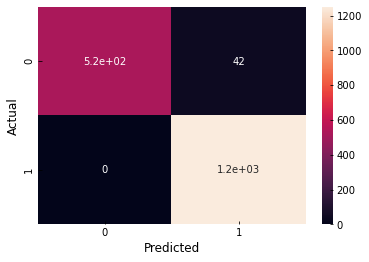

Confusion Matrix: Random Forest Classifier 
[[ 523   42]
 [   0 1250]]
Classification Report:Random Forest Classifier 
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       565
           1       0.97      1.00      0.98      1250

    accuracy                           0.98      1815
   macro avg       0.98      0.96      0.97      1815
weighted avg       0.98      0.98      0.98      1815

('Random Forest Classifier Accuracy:', 97.68595041322314)


In [13]:
print("A Random Forest Classifier model to predict  whether restaurant open or not")
clf = RandomForestClassifier(max_depth=7)
clf.fit(X_train, y_train.values.ravel())
y_true, y_pred = y_test, clf.predict(X_test)
print("\tModel\t\t\tTrain Acc\tTest Acc")
print("Random Forest Classifier \t\t  ",int(clf.score(X_train,y_train)*100),"% \t  ", int(100*clf.score(X_test,y_test)),"% \t ")
TrueResultslat=y_test
PredictedResultslat=clf.predict(X_test)
data = {'y_Actual':    y_test['Restaurant Status'],
    'y_Predicted': PredictedResultslat
    }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrixf = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrixf, annot=True)
plt.show()
print(("Confusion Matrix: Random Forest Classifier "))
print(confusion_matrix(y_test,PredictedResultslat))
print(("Classification Report:Random Forest Classifier "))
print(classification_report(y_test,PredictedResultslat))
LR_accuracy = metrics.accuracy_score(y_test, PredictedResultslat)
print(("Random Forest Classifier Accuracy:" ,LR_accuracy*100))
Accuracy_Random=LR_accuracy*100

A RidgeClassifier model to predict whether restaurant open or not
	Model			Train Acc	Test Acc
RidgeClassifier		   76 % 	   76 % 	  


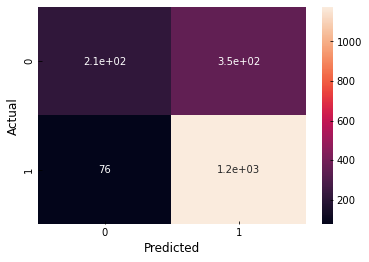

Confusion Matrix: RidgeClassifier 
[[ 214  351]
 [  76 1174]]
Classification Report:RidgeClassifier
              precision    recall  f1-score   support

           0       0.74      0.38      0.50       565
           1       0.77      0.94      0.85      1250

    accuracy                           0.76      1815
   macro avg       0.75      0.66      0.67      1815
weighted avg       0.76      0.76      0.74      1815

('RidgeClassifier Accuracy:', 76.47382920110192)


In [14]:
from sklearn.linear_model import RidgeClassifier
print("A RidgeClassifier model to predict whether restaurant open or not")
clf = RidgeClassifier()
clf.fit(X_train, y_train.values.ravel())
y_true, y_pred = y_test, clf.predict(X_test)
print("\tModel\t\t\tTrain Acc\tTest Acc")
print("RidgeClassifier\t\t  ",int(clf.score(X_train,y_train)*100),"% \t  ", int(100*clf.score(X_test,y_test)),"% \t  ")
TrueResultslat=y_test
PredictedResultslat=clf.predict(X_test)
data = {'y_Actual':    y_test['Restaurant Status'],
    'y_Predicted': PredictedResultslat
    }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrixf = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrixf, annot=True)
plt.show()
print(("Confusion Matrix: RidgeClassifier "))
print(confusion_matrix(y_test,PredictedResultslat))
print(("Classification Report:RidgeClassifier"))
print(classification_report(y_test,PredictedResultslat))
LR_accuracy = metrics.accuracy_score(y_test, PredictedResultslat)
print(("RidgeClassifier Accuracy:" ,LR_accuracy*100))
Accuracy_RidgeClassifier=LR_accuracy*100

A SGDClassifier model to predict whether restaurant open or not
	Model			Train Acc	Test Acc
SGDClassifier		   76 % 	   76 % 	  


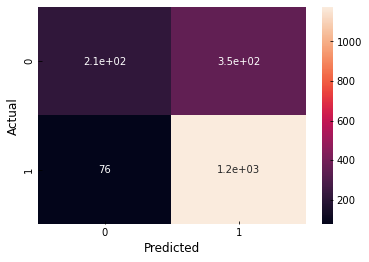

Confusion Matrix: SGDClassifier 
[[ 214  351]
 [  76 1174]]
Classification Report:SGDClassifier
              precision    recall  f1-score   support

           0       0.74      0.38      0.50       565
           1       0.77      0.94      0.85      1250

    accuracy                           0.76      1815
   macro avg       0.75      0.66      0.67      1815
weighted avg       0.76      0.76      0.74      1815

('SGDClassifier Accuracy:', 76.47382920110192)


In [15]:
from sklearn.linear_model import SGDClassifier
print("A SGDClassifier model to predict whether restaurant open or not")
clf = RidgeClassifier()
clf.fit(X_train, y_train.values.ravel())
y_true, y_pred = y_test, clf.predict(X_test)
print("\tModel\t\t\tTrain Acc\tTest Acc")
print("SGDClassifier\t\t  ",int(clf.score(X_train,y_train)*100),"% \t  ", int(100*clf.score(X_test,y_test)),"% \t  ")
TrueResultslat=y_test
PredictedResultslat=clf.predict(X_test)
data = {'y_Actual':    y_test['Restaurant Status'],
    'y_Predicted': PredictedResultslat
    }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrixf = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrixf, annot=True)
plt.show()
print(("Confusion Matrix: SGDClassifier "))
print(confusion_matrix(y_test,PredictedResultslat))
print(("Classification Report:SGDClassifier"))
print(classification_report(y_test,PredictedResultslat))
LR_accuracy = metrics.accuracy_score(y_test, PredictedResultslat)
print(("SGDClassifier Accuracy:" ,LR_accuracy*100))
Accuracy_SGDClassifier=LR_accuracy*100


A KNeighborsClassifier model to predict whether a Restaurant open or not
	Model			Train Acc	Test Acc
KNeighborsClassifier		   76 % 	   76 % 	  


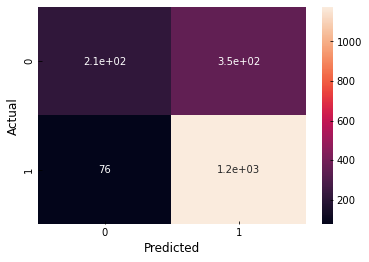

Confusion Matrix: KNeighborsClassifier 
[[ 214  351]
 [  76 1174]]
Classification Report:KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.74      0.38      0.50       565
           1       0.77      0.94      0.85      1250

    accuracy                           0.76      1815
   macro avg       0.75      0.66      0.67      1815
weighted avg       0.76      0.76      0.74      1815

('KNeighborsClassifier Accuracy:', 76.47382920110192)


In [16]:
from sklearn.neighbors import KNeighborsClassifier
print("A KNeighborsClassifier model to predict whether a Restaurant open or not")
clf = RidgeClassifier()
clf.fit(X_train, y_train.values.ravel())
y_true, y_pred = y_test, clf.predict(X_test)
print("\tModel\t\t\tTrain Acc\tTest Acc")
print("KNeighborsClassifier\t\t  ",int(clf.score(X_train,y_train)*100),"% \t  ", int(100*clf.score(X_test,y_test)),"% \t  ")
TrueResultslat=y_test
PredictedResultslat=clf.predict(X_test)
data = {'y_Actual':    y_test['Restaurant Status'],
    'y_Predicted': PredictedResultslat
    }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrixf = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrixf, annot=True)
plt.show()
print(("Confusion Matrix: KNeighborsClassifier "))
print(confusion_matrix(y_test,PredictedResultslat))
print(("Classification Report:KNeighborsClassifier"))
print(classification_report(y_test,PredictedResultslat))
LR_accuracy = metrics.accuracy_score(y_test, PredictedResultslat)
print(("KNeighborsClassifier Accuracy:" ,LR_accuracy*100))
Accuracy_KNeighborsClassifier=LR_accuracy*100


	Model			Train Acc	Test Acc
Multi-layer Perceptron Neural Network classifier.		   69 % 	   68 % 	  


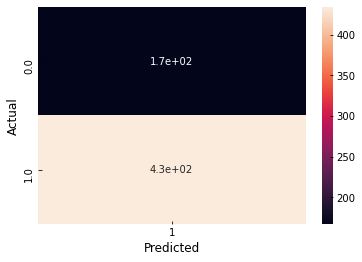

Multi-layer Perceptron Neural Network Classifier 
[[   0  565]
 [   0 1250]]
Classification Report:Multi-layer Perceptron Neural Network Classifier 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       565
           1       0.69      1.00      0.82      1250

    accuracy                           0.69      1815
   macro avg       0.34      0.50      0.41      1815
weighted avg       0.47      0.69      0.56      1815

('Multi-layer Perceptron Neural Network Accuracy:', 68.87052341597796)


In [17]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train.values.ravel())
y_true, y_pred = y_test, clf.predict(X_test)
print("\tModel\t\t\tTrain Acc\tTest Acc")
print("Multi-layer Perceptron Neural Network classifier.\t\t  ",int(clf.score(X_train,y_train)*100),"% \t  ", int(100*clf.score(X_test,y_test)),"% \t  ")
TrueResultslat=y_test
PredictedResultslat=clf.predict(X_test)
df = pd.DataFrame()
df['y_Predicted'] = list(PredictedResultslat)
df['y_Actual'] = y_test['Restaurant Status']
confusion_matrixf = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrixf, annot=True)
plt.show()
print(("Multi-layer Perceptron Neural Network Classifier "))
print(confusion_matrix(y_test,PredictedResultslat))
print(("Classification Report:Multi-layer Perceptron Neural Network Classifier "))
print(classification_report(y_test,PredictedResultslat))
LR_accuracy = metrics.accuracy_score(y_test, PredictedResultslat)
print(("Multi-layer Perceptron Neural Network Accuracy:" ,LR_accuracy*100))
Accuracy_MLP=LR_accuracy*100

In [18]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=31, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train.values.ravel(), epochs=150, batch_size=10)
# evaluate the keras model
TrueResultslat = y_test
PredictedResultslat = model.predict(X_test)
accuracy = model.evaluate(X_test, y_test)
Deep_Sequential_Neural = accuracy[1]*100
print()
print('Accuracy of Deep Sequential Neural Network: %.2f' % (Deep_Sequential_Neural))

Epoch 1/150
369/369 [==============================] - 0s 1ms/step - loss: 10125.8047 - accuracy: 0.5490
Epoch 2/150
369/369 [==============================] - 1s 1ms/step - loss: 1911.6201 - accuracy: 0.5943
Epoch 3/150
369/369 [==============================] - 1s 1ms/step - loss: 2276.0771 - accuracy: 0.6043
Epoch 4/150
369/369 [==============================] - 0s 1ms/step - loss: 1305.3031 - accuracy: 0.6174
Epoch 5/150
369/369 [==============================] - 0s 1ms/step - loss: 1245.4373 - accuracy: 0.6133
Epoch 6/150
369/369 [==============================] - 0s 1ms/step - loss: 1523.7068 - accuracy: 0.6309
Epoch 7/150
369/369 [==============================] - 1s 1ms/step - loss: 1971.8336 - accuracy: 0.6293
Epoch 8/150
369/369 [==============================] - 1s 1ms/step - loss: 1050.4833 - accuracy: 0.6393
Epoch 9/150
369/369 [==============================] - 1s 2ms/step - loss: 1059.4082 - accuracy: 0.6497
Epoch 10/150
369/369 [==============================] - 1s 2ms/

369/369 [==============================] - 1s 2ms/step - loss: 13.1078 - accuracy: 0.7031 0s - loss: 36.0885 - accur
Epoch 79/150
369/369 [==============================] - 0s 1ms/step - loss: 3.5801 - accuracy: 0.6966
Epoch 80/150
369/369 [==============================] - 1s 1ms/step - loss: 2.9758 - accuracy: 0.6969
Epoch 81/150
369/369 [==============================] - 1s 1ms/step - loss: 1.5417 - accuracy: 0.6944
Epoch 82/150
369/369 [==============================] - 0s 1ms/step - loss: 4.6562 - accuracy: 0.6841
Epoch 83/150
369/369 [==============================] - 0s 1ms/step - loss: 1.2656 - accuracy: 0.6896
Epoch 84/150
369/369 [==============================] - 0s 1ms/step - loss: 0.6020 - accuracy: 0.6980
Epoch 85/150
369/369 [==============================] - 0s 1ms/step - loss: 0.5844 - accuracy: 0.7056
Epoch 86/150
369/369 [==============================] - 0s 1ms/step - loss: 0.5824 - accuracy: 0.7085
Epoch 87/150
369/369 [==============================] - 1s 2ms/step

In [56]:
AA=pd.DataFrame()
AA['Algorithm']=[ 'SVM','Decision Tree Classifier','Multi-layer Perceptron Neural Network classifier','Deep Sequential Neural Network','Logistic Regression','Radom Forest Classification','Ridge Classification','SGD Classifier','K Neighbors Classifier']
AA['Accuracy (%)']=[Accuracy_SVM, Accuracy_Decision,Accuracy_MLP,Deep_Sequential_Neural,Accuracy_Logistic,Accuracy_Random,Accuracy_RidgeClassifier,Accuracy_SGDClassifier,Accuracy_KNeighborsClassifier]
AA=AA.sort_values(['Accuracy (%)'])
import plotly.express as px
fig = px.bar(AA, x='Algorithm', y='Accuracy (%)',title="Accuracy of each Classifier for Hotel Recommendation",color='Accuracy (%)')
fig.show()

KFold(n_splits=3, random_state=None, shuffle=False)
TRAIN: [1834 1835 1836 ... 5497 5498 5499] TEST: [   0    1    2 ... 1831 1832 1833]
A Random Forest Classifier model to predict  whether restaurant open or not
	Model			Train Acc	Test Acc
Random Forest Classifier 		   99 % 	   63 % 	  


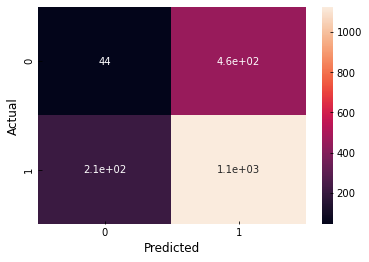

Confusion Matrix: Random Forest Classifier 
[[  44  456]
 [ 209 1125]]
Classification Report:Random Forest Classifier 
              precision    recall  f1-score   support

           0       0.17      0.09      0.12       500
           1       0.71      0.84      0.77      1334

    accuracy                           0.64      1834
   macro avg       0.44      0.47      0.44      1834
weighted avg       0.56      0.64      0.59      1834

('Random Forest Classifier Accuracy:', 63.74045801526718)
TRAIN: [   0    1    2 ... 5497 5498 5499] TEST: [1834 1835 1836 ... 3664 3665 3666]
A Random Forest Classifier model to predict  whether restaurant open or not
	Model			Train Acc	Test Acc
Random Forest Classifier 		   98 % 	   67 % 	  


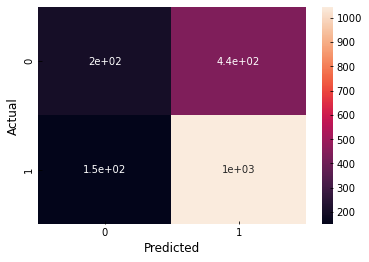

Confusion Matrix: Random Forest Classifier 
[[ 202  437]
 [ 150 1044]]
Classification Report:Random Forest Classifier 
              precision    recall  f1-score   support

           0       0.57      0.32      0.41       639
           1       0.70      0.87      0.78      1194

    accuracy                           0.68      1833
   macro avg       0.64      0.60      0.59      1833
weighted avg       0.66      0.68      0.65      1833

('Random Forest Classifier Accuracy:', 67.97599563557011)
TRAIN: [   0    1    2 ... 3664 3665 3666] TEST: [3667 3668 3669 ... 5497 5498 5499]
A Random Forest Classifier model to predict  whether restaurant open or not
	Model			Train Acc	Test Acc
Random Forest Classifier 		   98 % 	   64 % 	  


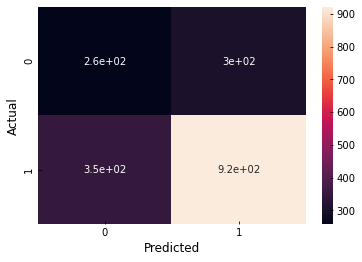

Confusion Matrix: Random Forest Classifier 
[[257 304]
 [350 922]]
Classification Report:Random Forest Classifier 
              precision    recall  f1-score   support

           0       0.42      0.46      0.44       561
           1       0.75      0.72      0.74      1272

    accuracy                           0.64      1833
   macro avg       0.59      0.59      0.59      1833
weighted avg       0.65      0.64      0.65      1833

('Random Forest Classifier Accuracy:', 64.32078559738135)


In [28]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf.get_n_splits(X)
print(kf)
KFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.50,shuffle=False)
    print("A Random Forest Classifier model to predict  whether restaurant open or not")
    clf = RandomForestClassifier(max_depth=7)
    clf.fit(X_train, y_train.values.ravel())
    y_true, y_pred = y_test, clf.predict(X_test)
    print("\tModel\t\t\tTrain Acc\tTest Acc")
    print("Random Forest Classifier \t\t  ",int(clf.score(X_train,y_train)*100),"% \t  ", int(100*clf.score(X_test,y_test)),"% \t  ")
    TrueResultslat=y_test
    PredictedResultslat=clf.predict(X_test)
    data = {'y_Actual':    y_test['Restaurant Status'],
        'y_Predicted': PredictedResultslat
        }
    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
    confusion_matrixf = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

    sns.heatmap(confusion_matrixf, annot=True)
    plt.show()
    print(("Confusion Matrix: Random Forest Classifier "))
    print(confusion_matrix(y_test,PredictedResultslat))
    print(("Classification Report:Random Forest Classifier "))
    print(classification_report(y_test,PredictedResultslat))
    LR_accuracy = metrics.accuracy_score(y_test, PredictedResultslat)
    print(("Random Forest Classifier Accuracy:" ,LR_accuracy*100))

# Working for Sales

In [57]:
X=data_set[['Restaurant Type', 'Area', 'District',
       'base on District-# of ppl able to work>15 - 19',
       'base on District-# of ppl able to work>20 - 24',
       'base on District-# of ppl able to work>25 - 29',
       'base on District-# of ppl able to work>30 - 34',
       'base on District-# of ppl able to work>35 - 39',
       'base on District-# of ppl able to work>40 - 44',
       'base on District-# of ppl able to work>45 - 49',
       'base on District-# of ppl able to work>50 - 54',
       'base on District-# of ppl able to work>55 - 59',
       'base on District-# of ppl able to work>60 - 64',
       'base on District-# of ppl able to work>65+',
       'base on Area #of worker location>15 - 19',
       'base on Area #of worker location>20 - 24',
       'base on Area #of worker location>25 - 29',
       'base on Area #of worker location>30 - 34',
       'base on Area #of worker location>35 - 39',
       'base on Area #of worker location>40 - 44',
       'base on Area #of worker location>45 - 49',
       'base on Area #of worker location>50 - 54',
       'base on Area #of worker location>55 - 59',
       'base on Area #of worker location>60 - 64',
       'base on Area #of worker location>65+', 'Restaurant Status',
       '#of transaction', 'sqf', 'mthly rent', 'Restaurant Type.1',
       'Location Type']]

In [58]:
y=data_set['total Sales']

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.20,shuffle=True)

regression score function:  0.9993290637860859
Mean Squared Error:  27218969596.02947


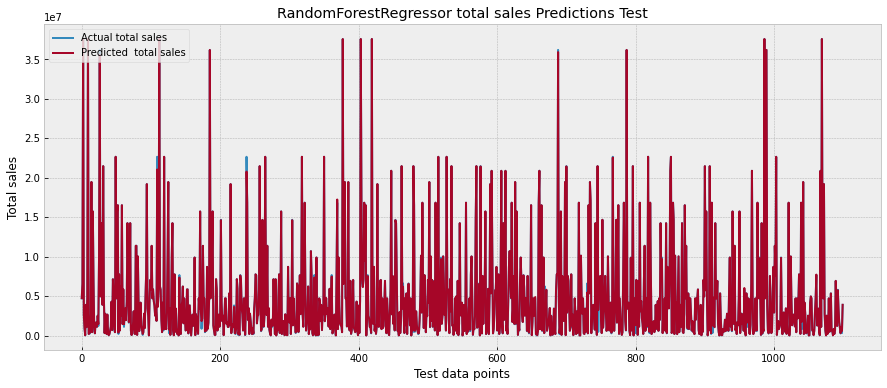

In [60]:
reg=RandomForestRegressor(n_estimators=200,random_state=0)
reg.fit(X_train,y_train)
pre=reg.predict(X_test)
rms=r2_score(y_test,pre)
print("regression score function: ",rms)
rms=mean_squared_error(y_test,pre)
print("Mean Squared Error: ",rms)

plt.rcParams["figure.figsize"] = (15,6)
plt.plot(y_test.values)
plt.plot(pre)
plt.title("RandomForestRegressor total sales Predictions Test")
plt.ylabel("Total sales")
plt.xlabel("Test data points")
plt.legend(['Actual total sales', 'Predicted  total sales'], loc='upper left')
plt.savefig("RandomForestRegressor Total Sales Predictions Test.png")
plt.show()
RMSE_RandomForestRegressor=rms
predicted_RandomForestRegressor=pre

regression score function:  0.9999309146011934
Mean Squared Error:  2887691268.5001087


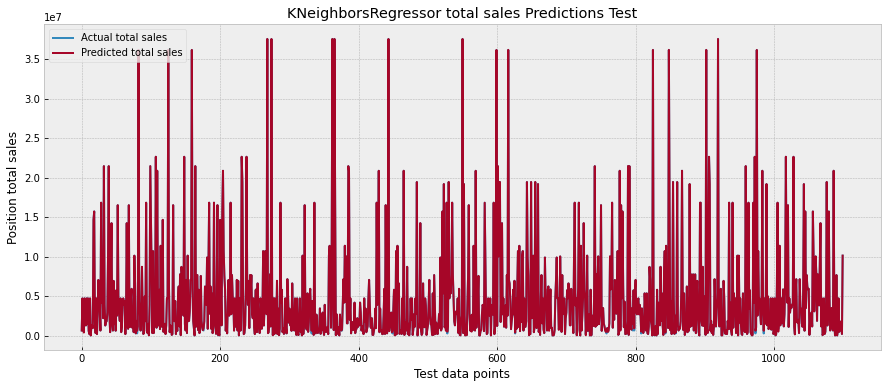

In [33]:
reg=KNeighborsRegressor()
reg.fit(X_train,y_train)
pre=reg.predict(X_test)

rms=r2_score(y_test,pre)
print("regression score function: ",rms)
rms=mean_squared_error(y_test,pre)
print("Mean Squared Error: ",rms)
plt.rcParams["figure.figsize"] = (15,6)
plt.plot(y_test.values)
plt.plot(pre)
plt.title("KNeighborsRegressor total sales Predictions Test")
plt.ylabel("Position total sales")
plt.xlabel("Test data points")
plt.legend(['Actual total sales', 'Predicted total sales'], loc='upper left')
plt.savefig("KNeighborsRegressor Total Sales Predictions test.png")
plt.show()
RMSE_KNeighborsRegressor=rms
predicted_KNeighborsRegressor=pre

regression score function:  0.9940466374215072
Mean Squared Error:  248843799603.09546


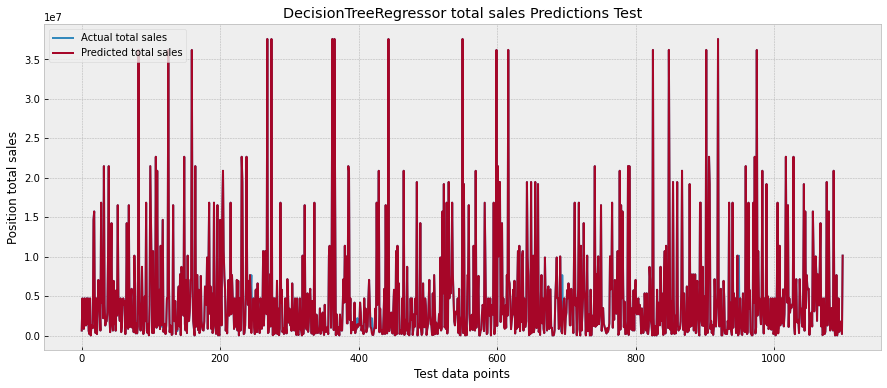

In [34]:
reg=DecisionTreeRegressor()
reg.fit(X_train,y_train)
pre=reg.predict(X_test)
rms=r2_score(y_test,pre)
print("regression score function: ",rms)
rms=mean_squared_error(y_test,pre)
print("Mean Squared Error: ",rms)

plt.rcParams["figure.figsize"] = (15,6)
plt.plot(y_test.values)
plt.plot(pre)
plt.title("DecisionTreeRegressor total sales Predictions Test")
plt.ylabel("Position total sales")
plt.xlabel("Test data points")
plt.legend(['Actual total sales', 'Predicted total sales'], loc='upper left')
plt.savefig("DecisionTreeRegressor Total Sales Predictions test.png")
plt.show()
RMSE_DecisionTreeRegressor=rms
predicted_DecisionTreeRegressor=pre

regression score function:  0.9686956294901441
Mean Squared Error:  1308487161524.0645


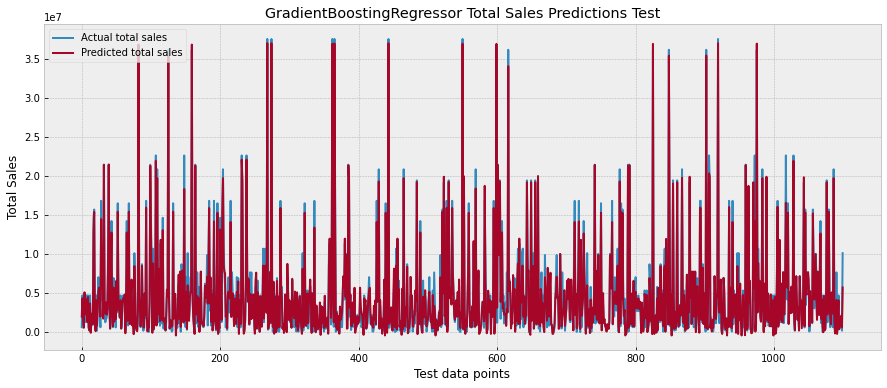

In [35]:
reg=GradientBoostingRegressor()
reg.fit(X_train,y_train)
pre=reg.predict(X_test)
rms=r2_score(y_test,pre)
print("regression score function: ",rms)
rms=mean_squared_error(y_test,pre)
print("Mean Squared Error: ",rms)

plt.rcParams["figure.figsize"] = (15,6)
plt.plot(y_test.values)
plt.plot(pre)
plt.title("GradientBoostingRegressor Total Sales Predictions Test")
plt.ylabel("Total Sales")
plt.xlabel("Test data points")
plt.legend(['Actual total sales', 'Predicted total sales'], loc='upper left')
plt.savefig("GradientBoostingRegressor Total Sales Predictions test.png")
plt.show()
RMSE_GradientBoostingRegressor=rms
predicted_GradientBoostingRegressor=pre

regression score function:  0.6064242153279649
Mean Squared Error:  16451021149522.178


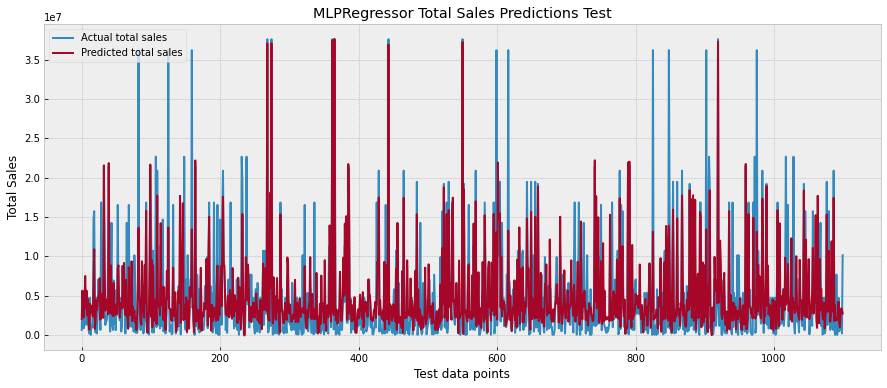

In [36]:
reg=MLPRegressor()
reg.fit(X_train,y_train)
pre=reg.predict(X_test)
rms=r2_score(y_test,pre)
print("regression score function: ",rms)
rms=mean_squared_error(y_test,pre)
print("Mean Squared Error: ",rms)

plt.rcParams["figure.figsize"] = (15,6)
plt.plot(y_test.values)
plt.plot(pre)
plt.title("MLPRegressor Total Sales Predictions Test")
plt.ylabel("Total Sales")
plt.xlabel("Test data points")
plt.legend(['Actual total sales', 'Predicted total sales'], loc='upper left')
plt.show()
RMSE_MLPRegressor=rms
predicted_MLPRegressor=pre

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
#Y = y
import time
model = Sequential()
model.add(Dense(20, input_dim=31, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')
start=time.time()
model.fit(X_train, y_train, epochs=1000, verbose=0)
ynew = model.predict(X_test)
Time__NNBF=time.time()-start
print(Time__NNBF)


93.71571373939514


In [38]:
predicted_NNFB=ynew 

In [39]:
rms=mean_squared_error(ynew,y_test)
print("Root Mean Square Error: ",rms)
ynew=pd.DataFrame(ynew)
ynew.to_csv('FeedBacktestX.csv')
#!cp FeedBacktestX.csv "drive/My Drive/"

Root Mean Square Error:  17748010496576.867


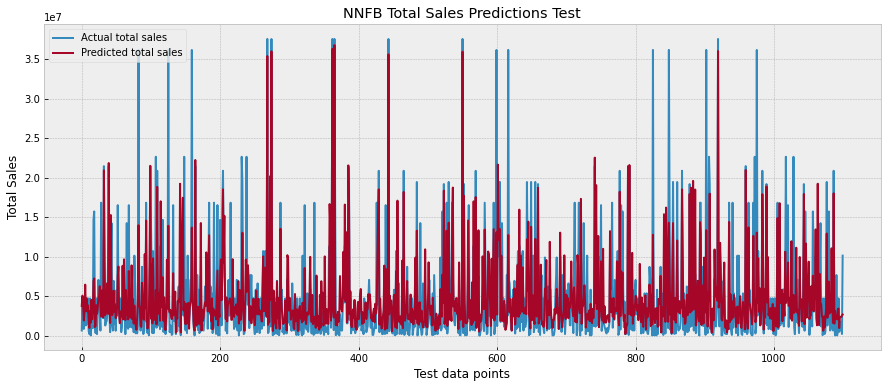

In [40]:
plt.rcParams["figure.figsize"] = (15,6)
plt.plot(y_test.values)
plt.plot(predicted_NNFB)
plt.title("NNFB Total Sales Predictions Test")
plt.ylabel("Total Sales")
plt.xlabel("Test data points")
plt.legend(['Actual total sales', 'Predicted total sales'], loc='upper left')
plt.show()
RMSE_NNBF=rms


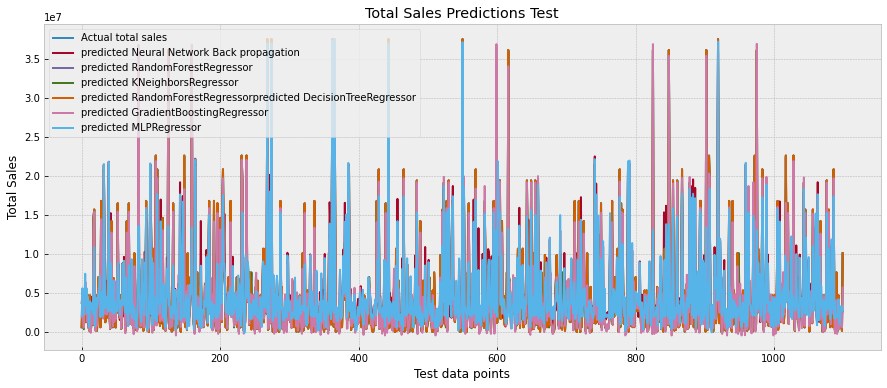

In [41]:
plt.plot(y_test.values)
plt.plot(predicted_NNFB)
plt.plot(predicted_RandomForestRegressor)
plt.plot(predicted_KNeighborsRegressor)
plt.plot(predicted_DecisionTreeRegressor)
plt.plot(predicted_GradientBoostingRegressor)
plt.plot(predicted_MLPRegressor)



plt.rcParams["figure.figsize"] = (15,6)
plt.title("Total Sales Predictions Test")
plt.ylabel("Total Sales")
plt.xlabel("Test data points")
plt.legend(['Actual total sales','predicted Neural Network Back propagation'
           ,'predicted RandomForestRegressor','predicted KNeighborsRegressor','predicted RandomForestRegressor'
           'predicted DecisionTreeRegressor','predicted GradientBoostingRegressor','predicted MLPRegressor'], loc='upper left')
plt.savefig("Testig X complete.png")
plt.show()


In [42]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
new=pd.DataFrame()
new['Algorithm']=[ 'RandomForestRegressor','KNeighborsRegressor',
                  'DecisionTreeRegressor','GradientBoostingRegressor','MLPRegressor','NeuralBack']
new[ "Mean Squared Error" ]=[RMSE_RandomForestRegressor , RMSE_KNeighborsRegressor
                             ,RMSE_DecisionTreeRegressor  ,RMSE_GradientBoostingRegressor, RMSE_MLPRegressor  , RMSE_NNBF]
new


In [47]:
fig = px.bar(new, x='Algorithm', y="Mean Squared Error",
             title="Mean Squared Error for Each Algorithm to predict sales",color='Mean Squared Error')
fig.data[-1].text = new['Mean Squared Error']
fig.update_traces(textposition='outside')
fig.show()

KFold(n_splits=5, random_state=None, shuffle=False)
TRAIN: [1100 1101 1102 ... 5497 5498 5499] TEST: [   0    1    2 ... 1097 1098 1099]
regression score function:  -275.0766334214991
Mean Squared Error:  9255556653586.008


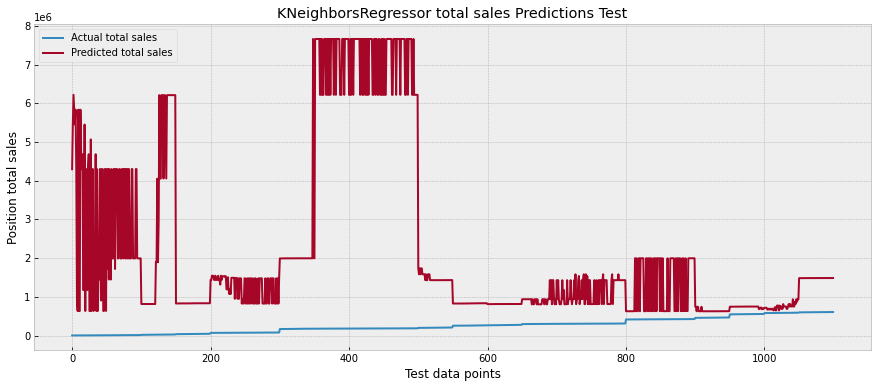

TRAIN: [   0    1    2 ... 5497 5498 5499] TEST: [1100 1101 1102 ... 2197 2198 2199]
regression score function:  -200.52681080568195
Mean Squared Error:  15451744418213.938


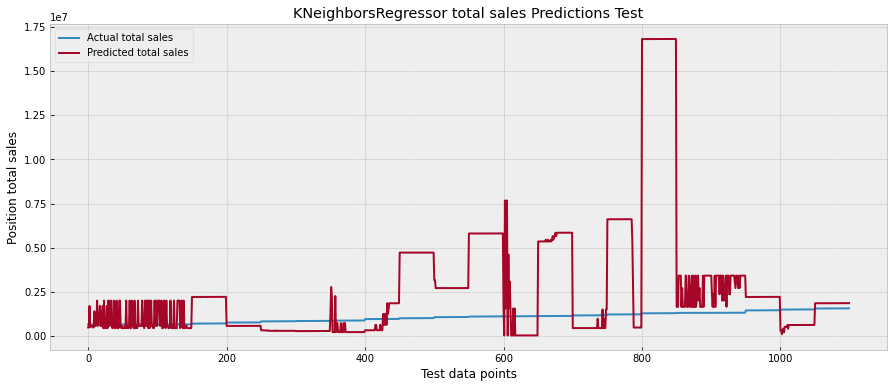

TRAIN: [   0    1    2 ... 5497 5498 5499] TEST: [2200 2201 2202 ... 3297 3298 3299]
regression score function:  -63.55654684672476
Mean Squared Error:  41702753385603.52


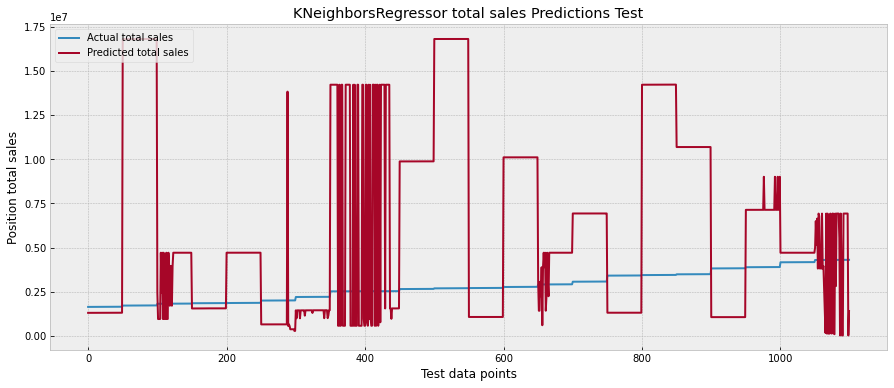

TRAIN: [   0    1    2 ... 5497 5498 5499] TEST: [3300 3301 3302 ... 4397 4398 4399]
regression score function:  -33.17382878567342
Mean Squared Error:  26353942560488.1


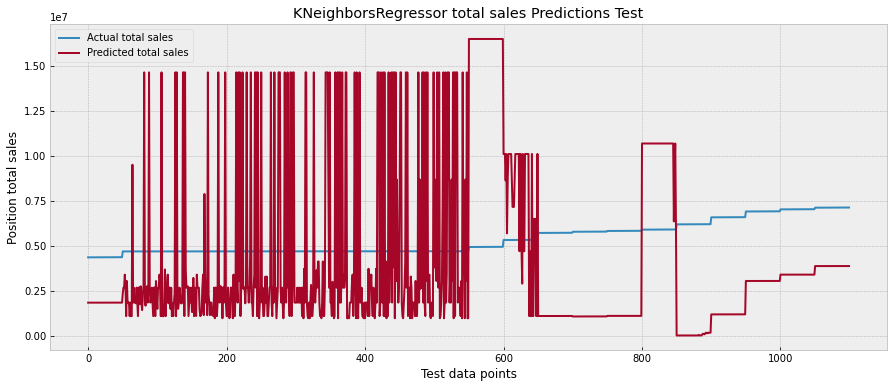

TRAIN: [   0    1    2 ... 4397 4398 4399] TEST: [4400 4401 4402 ... 5497 5498 5499]
regression score function:  -2.4116443204399562
Mean Squared Error:  220147507634497.03


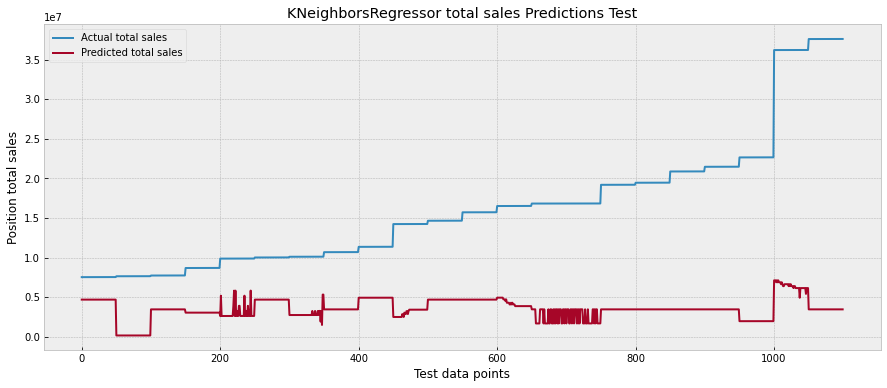

In [48]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.get_n_splits(X)
print(kf)
KFold(n_splits=5, random_state=None, shuffle=False)
KFold(n_splits=2, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    reg=KNeighborsRegressor()
    reg.fit(X_train,y_train)
    pre=reg.predict(X_test)

    rms=r2_score(y_test,pre)
    print("regression score function: ",rms)
    rms=mean_squared_error(y_test,pre)
    print("Mean Squared Error: ",rms)
    plt.rcParams["figure.figsize"] = (15,6)
    plt.plot(y_test.values)
    plt.plot(pre)
    plt.title("KNeighborsRegressor total sales Predictions Test")
    plt.ylabel("Position total sales")
    plt.xlabel("Test data points")
    plt.legend(['Actual total sales', 'Predicted total sales'], loc='upper left')
    plt.savefig("KNeighborsRegressor Total Sales Predictions test.png")
    plt.show()